In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv("train.csv")
data = train_data.copy()

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Split the train data into two dataframes.
# X contains the features
# y contains the target 
X = data.loc[:,data.columns != 'label']
y = data['label']

In [5]:
#Breaking the data into the train test split
X_train, X_test, y_train, y_test = X[:37000], X[37000:], y[:37000], y[37000:]

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [7]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)

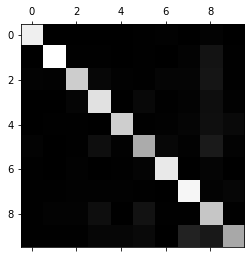

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
n_clf = KNeighborsClassifier()
n_clf.fit(X_train, y_train)
n_clf.predict(X_test)

array([9, 5, 2, ..., 7, 6, 9], dtype=int64)

In [21]:
k_range = list(range(1,11))
param_grid = dict(n_neighbors = k_range)
grid = GridSearchCV(n_clf, param_grid, cv=3, scoring='accuracy',return_train_score = False, verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [22]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
print(grid_search.best_params_)

{'n_neighbors': 5}


In [26]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
hat=knn.predict(X_test)

In [27]:
test_accuracy=accuracy_score(y_test,hat)*100
test_accuracy

96.78

In [38]:
final_test_data = pd.read_csv('test.csv')
final_test_data.shape

(28000, 784)

In [30]:
final = knn.predict(final_test_data)

In [47]:
final_df = pd.DataFrame(final, columns = ['Label'])
final_df.index += 1

In [48]:
final_df

,Label
1,2
2,0
3,9
4,9
5,3
...,...
27996,9
27997,7
27998,3
27999,9


In [49]:
final_df.to_csv('submission.csv')